## EDA 

Data from MHCflurry 2.0 - S3
https://data.mendeley.com/datasets/zx3kjzc3yx/3

We only keep HLA types MHC molecules

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('../Data/Data_S3.csv')

# Only HLA
df = df[df['allele'].str.contains('HLA', na=False)]

# Only HLA-A, -B and -C
df_A = df[df['allele'].str.contains('HLA-A', na=False)]
df_B = df[df['allele'].str.contains('HLA-B', na=False)]
df_C = df[df['allele'].str.contains('HLA-C', na=False)]

df = pd.concat([df_A, df_B, df_C]).reset_index(drop=True)

# Only binding data
df = df[df['measurement_kind']=='affinity']

# Drop duplicates
df = df.drop_duplicates(['peptide','allele']).reset_index(drop=True)

print(f"Number of HLA pairs {len(df)}, number of HLA {len(df['allele'].unique())}, number of peptides {len(df['peptide'].unique())}")

# Label
df['y'] = [1 if i<=500 else 0 for i in df['measurement_value']]

# peptide length
df['peptide_length'] = [len(i) for i in df['peptide']]

# Save df
df.to_csv('../Data/Data_HLA.csv')

Number of HLA pairs 165532, number of HLA 131, number of peptides 35783


In [3]:
len9_df = df[df['peptide_length']==9].reset_index(drop=True)

# HLA count and positive and negative class
count_len9_df_1 = len9_df[['allele']].value_counts().reset_index().rename(columns={0:'total_len9'})

counts_len9_df_2 = len9_df[['allele','y']].value_counts().reset_index().rename(columns={0:'positives_len9'})
counts_len9_df_2 = counts_len9_df_2[counts_len9_df_2['y']==1]

counts_len9_df = pd.merge(count_len9_df_1, counts_len9_df_2, on='allele', how='left').drop('y',axis=1)
counts_len9_df['positives_len9'] = counts_len9_df['positives_len9'].fillna(0)

counts_len9_df['negatives_len9'] = counts_len9_df['total_len9'] - counts_len9_df['positives_len9']
counts_len9_df['positive_ratio_len9'] = counts_len9_df['positives_len9']/counts_len9_df['total_len9']

counts_len9_df

,allele,total_len9,positives_len9,negatives_len9,positive_ratio_len9
0,HLA-A*02:01,11610,4344.0,7266.0,0.374160
1,HLA-A*03:01,5615,1407.0,4208.0,0.250579
2,HLA-A*11:01,4697,1467.0,3230.0,0.312327
3,HLA-A*02:03,4449,1544.0,2905.0,0.347044
4,HLA-B*07:02,4434,1156.0,3278.0,0.260713
...,...,...,...,...,...
123,HLA-B*55:01,2,2.0,0.0,1.000000
124,HLA-A*24:01,2,1.0,1.0,0.500000
125,HLA-B*35:02,1,1.0,0.0,1.000000
126,HLA-A*02:09,1,0.0,1.0,0.000000


In [4]:
# HLA count and positive and negative class
count_df_1 = df[['allele']].value_counts().reset_index().rename(columns={0:'total'})

counts_df_2 = df[['allele','y']].value_counts().reset_index().rename(columns={0:'positives'})
counts_df_2 = counts_df_2[counts_df_2['y']==1]

counts_df = pd.merge(count_df_1, counts_df_2, on='allele', how='left').drop('y',axis=1)
counts_df['positives'] = counts_df['positives'].fillna(0)

counts_df['negatives'] = counts_df['total'] - counts_df['positives']
counts_df['positive_ratio'] = counts_df['positives']/counts_df['total']

counts_df

,allele,total,positives,negatives,positive_ratio
0,HLA-A*02:01,15726,6058.0,9668.0,0.385222
1,HLA-A*03:01,7651,2234.0,5417.0,0.291988
2,HLA-A*11:01,6660,2318.0,4342.0,0.348048
3,HLA-A*02:03,6333,2409.0,3924.0,0.380388
4,HLA-A*31:01,5745,1618.0,4127.0,0.281636
...,...,...,...,...,...
126,HLA-C*08:03,3,0.0,3.0,0.000000
127,HLA-B*27:10,3,0.0,3.0,0.000000
128,HLA-A*24:01,2,1.0,1.0,0.500000
129,HLA-B*13:02,1,1.0,0.0,1.000000


In [5]:
counts_df = counts_df.merge(counts_len9_df, on='allele', how='left').fillna(0)

In [6]:
# Save count df
counts_df.to_csv('../Data/HLA_peptide_count.csv')

## PLOT

In [7]:
## constants
fontsize=14
dpi = 600
color = 'cornflowerblue'

0.3115808823529412


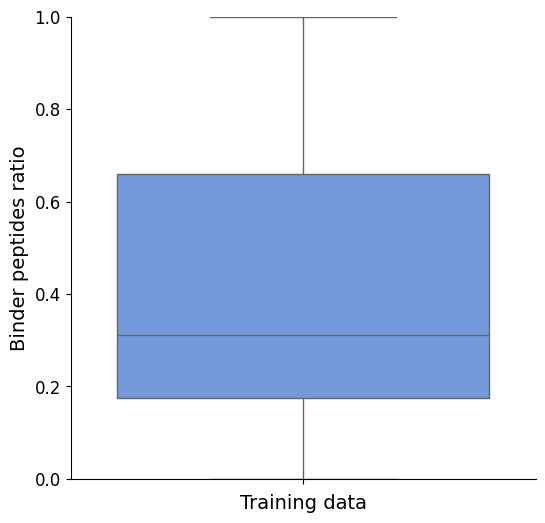

In [8]:
# plot positive ratio distribution
counts_df = pd.read_csv('../Data/HLA_peptide_count.csv',index_col=0)
print(counts_df['positive_ratio_len9'].median())

fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

b = sns.boxplot(data=counts_df, y='positive_ratio_len9', 
                ax=axs, color=color)
b.set_ylabel('Binder peptides ratio', fontsize=fontsize)
# Retrieve and modify existing y-axis tick labels fontsize
yticklabels = axs.get_yticklabels()
for label in yticklabels:
    label.set_fontsize(fontsize-2)  # Set fontsize to 12
b.set_xlabel('Training data', fontsize=fontsize)
b.set(ylim=(0,1))
sns.despine(top=True, right=True)

/tmp/ipykernel_19734/560110900.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)
/tmp/ipykernel_19734/560110900.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)


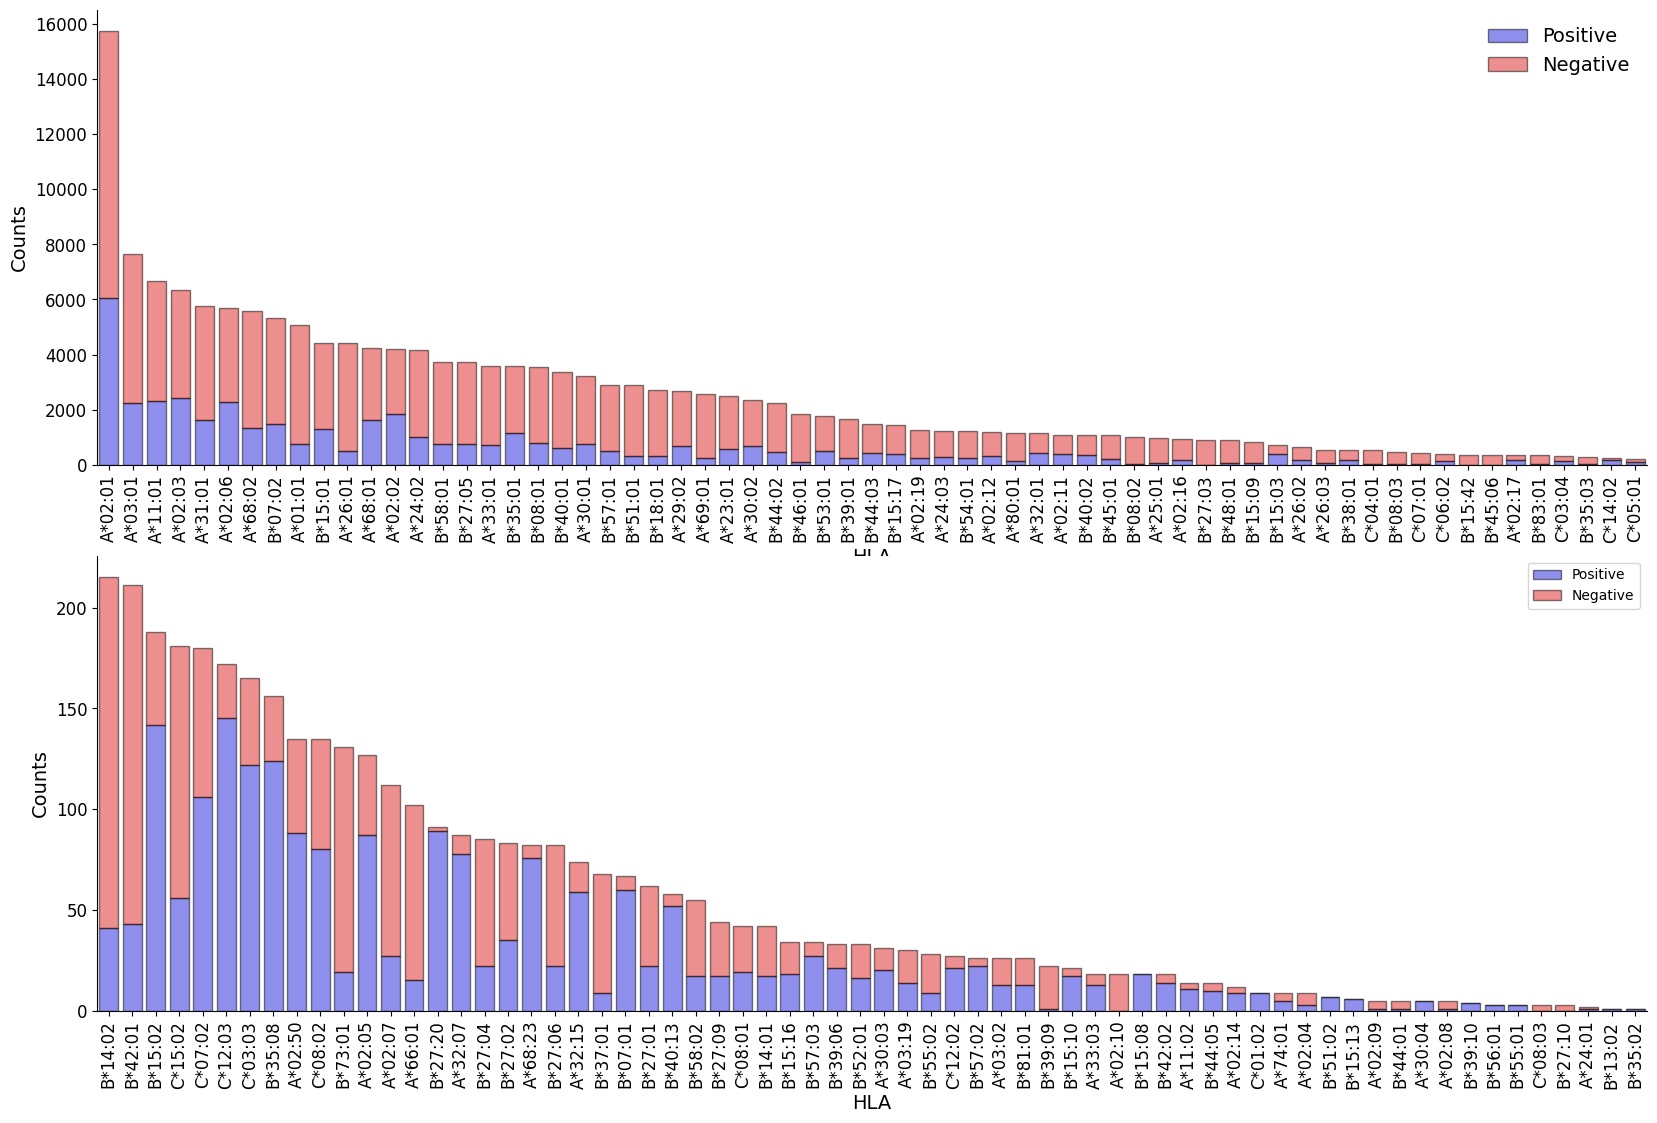

In [9]:
# Plot HLA counts distribution

fig,axs = plt.subplots(nrows=2, ncols=1, figsize=(20,13))

###### top half

top_half_df = counts_df.iloc[0:65]

# Plotting positive counts
b = sns.barplot(data=top_half_df, x='allele', y='positives', color='b', alpha=0.5, edgecolor='black', 
            label='Positive', ax=axs[0])


# Plotting negative counts
sns.barplot(data=top_half_df, x='allele', y='negatives', color='r', alpha=0.5, edgecolor='black',
            label='Negative', bottom=top_half_df['positives'], ax=b)

# Adding labels 
# Retrieve and modify existing y-axis tick labels fontsize
yticklabels = axs[0].get_yticklabels()
for label in yticklabels:
    label.set_fontsize(fontsize-2)  # Set fontsize to 12
    
xticklabels = [i.get_text()[4:] for i in b.get_xticklabels()]
b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)


axs[0].set_xlabel('HLA',fontsize=fontsize)
axs[0].set_ylabel('Counts',fontsize=fontsize)

axs[0].legend(frameon=False, fontsize=fontsize,)
sns.despine(top=True, right=True)

###### lower half
bottom_half_df = counts_df.iloc[65:]

# Plotting positive counts
b = sns.barplot(data=bottom_half_df, x='allele', y='positives', color='b', alpha=0.5, edgecolor='black', 
            label='Positive', ax=axs[1])


# Plotting negative counts
sns.barplot(data=bottom_half_df, x='allele', y='negatives', color='r', alpha=0.5, edgecolor='black',
            label='Negative', bottom=bottom_half_df['positives'], ax=b)

# Adding labels 
# Retrieve and modify existing y-axis tick labels fontsize
yticklabels = axs[1].get_yticklabels()
for label in yticklabels:
    label.set_fontsize(fontsize-2)  # Set fontsize to 12
    
xticklabels = [i.get_text()[4:] for i in b.get_xticklabels()]
b.set_xticklabels(xticklabels,fontsize=fontsize-2,rotation=90)


axs[1].set_xlabel('HLA',fontsize=fontsize)
axs[1].set_ylabel('Counts',fontsize=fontsize)

# axs[1].legend(frameon=False, fontsize=fontsize,)
sns.despine(top=True, right=True)


fig.savefig('../figures/EDA/HLA_count_distribution.png',dpi=dpi, transparent=True)

/tmp/ipykernel_19734/568585046.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(['BA Data'],fontsize=fontsize-2)
/tmp/ipykernel_19734/568585046.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels(b.get_yticklabels(),fontsize=fontsize-2)


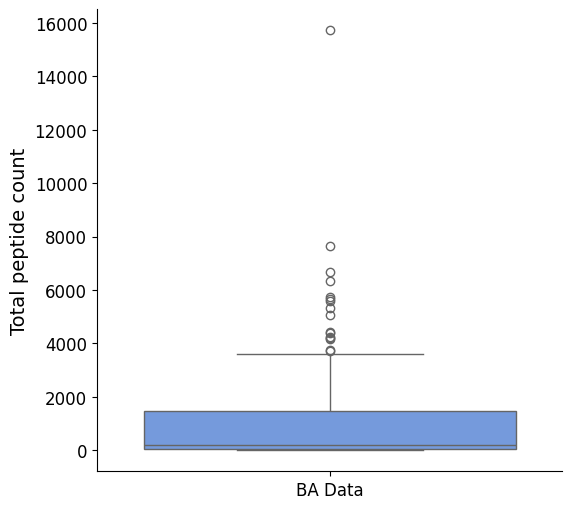

In [10]:
# Plot total peptides per HLA
fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

b = sns.boxplot(data=counts_df, y='total', ax=axs, color=color)

plt.draw()
b.set_xticklabels(['BA Data'],fontsize=fontsize-2)
b.set_yticklabels(b.get_yticklabels(),fontsize=fontsize-2)
b.set_ylabel('Total peptide count',fontsize=fontsize)

sns.despine(top=True, right=True)
fig.savefig('../figures/EDA/total_peptides_per_HLA.png',dpi=dpi, transparent=True)

/tmp/ipykernel_19734/773651039.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(),fontsize=fontsize-2)
/tmp/ipykernel_19734/773651039.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_yticklabels(b.get_yticklabels(),fontsize=fontsize-2)


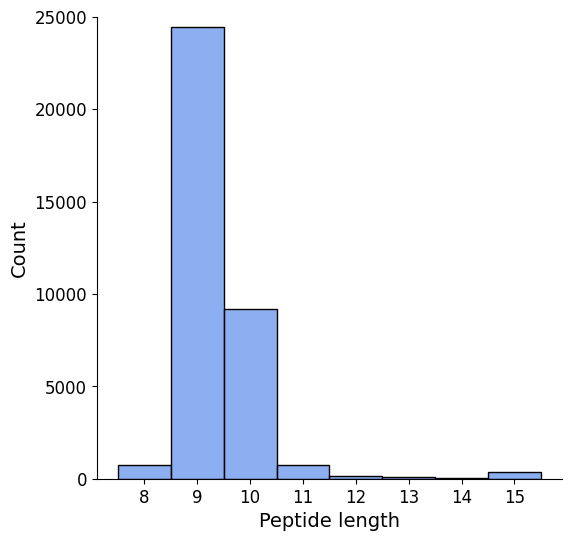

In [11]:
# plot peptide length distribution

fig,axs = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

b = sns.histplot(data=df[['peptide_length','peptide']].drop_duplicates('peptide'), 
                 x='peptide_length', color=color, ax=axs,
                discrete=True)

# For ticklabels, you need to populate the fig first
plt.draw()

b.set_xticklabels(b.get_xticklabels(),fontsize=fontsize-2)
b.set_yticklabels(b.get_yticklabels(),fontsize=fontsize-2)
b.set_xlabel('Peptide length',fontsize=fontsize)
b.set_ylabel('Count',fontsize=fontsize)

b.set(ylim=(0,25000))


sns.despine(top=True, right=True)
fig.savefig('../figures/EDA/peptide_length_distribution.png',dpi=dpi, transparent=True)